In [437]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np

In [438]:
sns.set(font="Verdana")

In [439]:
delay_events = pd.read_csv('../../data/processed-data/nyct-events.csv')

In [440]:
delay_events

,Event ID,First alert datetime,Last alert datetime,Number of updates,Affected services,Combined description,Issue,Issue type,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,ADA
0,82,2020-04-28T14:38:00,2020-04-28T14:45:00,2,3,3 trains are running with delays in both direc...,Brakes activated,Brake activated,301,IRT,Lenox - White Plains Rd,Harlem-148 St,M,3,Subway,40.823880,-73.936470,False
1,85,2020-04-28T20:09:00,2020-04-28T20:09:00,1,6,Southbound 6 trains are proceeding at normal s...,Signal problem,Mechanical issue,612,IRT,Pelham,Whitlock Av,Bx,6,Elevated,40.826525,-73.886283,False
2,86,2020-04-28T20:45:00,2020-04-28T20:45:00,1,2 3,Southbound 2 and 3 trains are proceeding at no...,Signal problem,Mechanical issue,132,IRT,Broadway - 7Av,14 St,M,1 2 3,Subway,40.737826,-74.000201,False
3,87,2020-04-28T20:51:00,2020-04-28T20:51:00,1,4,Southbound 4 trains have resumed making expres...,Signal problem,Mechanical issue,132,IRT,Broadway - 7Av,14 St,M,1 2 3,Subway,40.737826,-74.000201,False
4,88,2020-04-28T20:40:00,2020-04-28T20:56:00,2,A,Northbound A trains are delayed while our crew...,Door problem,Mechanical issue,A40,IND,8th Av - Fulton St,High St,Bk,A C,Subway,40.699337,-73.990531,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67016,167851,2024-08-30T21:13:00,2024-08-30T21:27:00,2,1,Southbound 1 trains are delayed while we addre...,Signal problem,Mechanical issue,137,IRT,Broadway - 7Av,Chambers St,M,1 2 3,Subway,40.715478,-74.009266,True
67017,167852,2024-08-30T21:20:00,2024-08-30T21:20:00,1,2 3,Northbound 2 3 trains are running with delays ...,Disruptive passenger,Passenger issue,123,IRT,Broadway - 7Av,72 St,M,1 2 3,Subway,40.778453,-73.981970,True
67018,167853,2024-08-30T21:43:00,2024-08-30T21:48:00,2,C A,Southbound A C trains are delayed while we rem...,Unspecified train problem,Mechanical issue,A38,IND,8th Av - Fulton St,Fulton St,M,A C,Subway,40.710197,-74.007691,True
67019,167855,2024-08-30T22:08:00,2024-08-30T22:08:00,1,L,8 Av-bound L trains are running with delays af...,Brakes activated,Brake activated,L06,BMT,Canarsie,1 Av,M,L,Subway,40.730953,-73.981628,True


In [533]:
services_scheduled = pd.read_csv('../../data/raw-data/subway-service-delivered.csv')

In [540]:
services_scheduled["line"] = services_scheduled["line"].apply(clean_service)
services_scheduled = services_scheduled[services_scheduled["line"] != "Systemwide"]
services_scheduled = services_scheduled[services_scheduled["month"] >= "2020-04-01"]
services_scheduled

,month,division,line,day_type,num_sched_trains,num_actual_trains,service delivered
0,2024-08-01,A DIVISION,1,1,1848,1763,95.400400
1,2024-08-01,A DIVISION,1,2,1296,1249,96.373500
2,2024-08-01,A DIVISION,2,2,1881,1799,95.640600
3,2024-08-01,A DIVISION,2,1,2441,2239,91.724700
4,2024-08-01,A DIVISION,3,1,2266,2148,94.792600
...,...,...,...,...,...,...,...
2508,2020-04-01,B DIVISION,R,1,780,679,87.051282
2509,2020-04-01,B DIVISION,None,1,468,467,99.786325
2510,2020-04-01,B DIVISION,None,2,352,352,100.000000
2511,2020-04-01,B DIVISION,H,2,224,224,100.000000


In [541]:
per_service_total = services_scheduled.groupby(["month", "line"]).aggregate(
    num_sched_trains=("num_sched_trains", "sum")).reset_index().sort_values("num_sched_trains", ascending=False)
per_service_per_month

,month,line,num_sched_trains
394,2021-10-01,4,5404
130,2020-10-01,4,5352
658,2022-10-01,4,5323
1032,2024-03-01,4,5272
350,2021-08-01,4,5246
...,...,...,...
14,2020-04-01,L,651
295,2021-05-01,H,625
251,2021-03-01,H,507
12,2020-04-01,H,458


In [536]:
per_service_monthly_average = per_service_per_month.groupby(["line"]).aggregate(
    monthly_average=("num_sched_trains", "mean")).reset_index().sort_values("monthly_average", ascending=False)
per_service_monthly_average

,line,monthly_average
3,4,4880.125000
7,A,4098.785714
6,7,3995.089286
1,2,3888.589286
19,Q,3822.642857
12,F,3791.607143
4,5,3533.267857
16,L,3373.892857
2,3,3331.910714
20,R,3268.410714


# Preliminary analysis

In [444]:
def plot_data(x, y, title, plot_fn=sns.barplot, x_label=None, y_label=None, size=(9, 7), x_label_rot=0, **kwargs):
    fig, ax = plt.subplots(figsize=size)
    plot_fn(
        x=x, 
        y=y,
        ax=ax,
        **kwargs)
    ax.set_title(title)
    if x_label:
        ax.set_xlabel(x_label)
    if y_label:
        ax.set_ylabel(y_label)
    ax.tick_params(axis='x', rotation=x_label_rot)
    plt.show()

In [445]:
delay_events["Issue"] = delay_events["Issue"].fillna("(Unknown)")
delay_events["Issue type"] = delay_events["Issue type"].fillna("(Unknown)")

In [446]:
delay_events_by_issue = delay_events.groupby("Issue").aggregate(
    **{"Count": ("Event ID", "count")}
).reset_index().sort_values("Count", ascending=False)

In [550]:
json_data = []
for key, row in delay_events_by_issue.iterrows():
    json_data.append({"Issue": row["Issue"], "Frequency": row["Count"]})
sorted(json_data, key=lambda x: -x["Frequency"])

[{'Issue': 'Brakes activated', 'Frequency': 10290},
 {'Issue': 'Disruptive passenger', 'Frequency': 9324},
 {'Issue': 'Medical emergency', 'Frequency': 6595},
 {'Issue': 'Door problem', 'Frequency': 5233},
 {'Issue': 'Signal problem', 'Frequency': 5191},
 {'Issue': 'Unspecified train problem', 'Frequency': 5019},
 {'Issue': 'Unspecified mechanical problem', 'Frequency': 2589},
 {'Issue': '(Unknown)', 'Frequency': 2442},
 {'Issue': 'Unspecified NYPD response', 'Frequency': 2209},
 {'Issue': 'Switch problem', 'Frequency': 2110},
 {'Issue': 'Person on tracks', 'Frequency': 1769},
 {'Issue': 'Track maintenance', 'Frequency': 1733},
 {'Issue': 'Cleaning', 'Frequency': 1696},
 {'Issue': 'Fire / smoke', 'Frequency': 1294},
 {'Issue': 'South Channel Bridge open', 'Frequency': 1293},
 {'Issue': 'Rail problem', 'Frequency': 1257},
 {'Issue': 'Unspecified EMS response', 'Frequency': 1253},
 {'Issue': 'Something on tracks', 'Frequency': 827},
 {'Issue': 'Power issue', 'Frequency': 727},
 {'Issue':

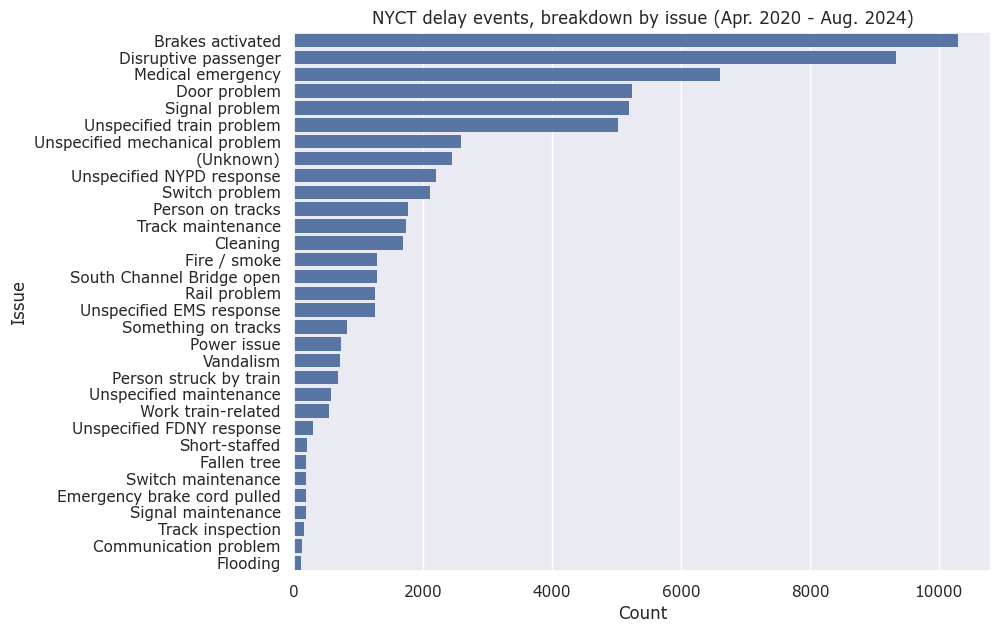

In [447]:
plot_data(x=delay_events_by_issue["Count"], 
          y=delay_events_by_issue["Issue"],
          title="NYCT delay events, breakdown by issue (Apr. 2020 - Aug. 2024)",
          edgecolor='none')

In [448]:
delay_events_by_issue_type = delay_events.groupby("Issue type").aggregate(
    **{"Count": ("Event ID", "count")}
).reset_index().sort_values("Count", ascending=False)

In [552]:
json_data = []
for key, row in delay_events_by_issue_type.iterrows():
    json_data.append({"Issue type": row["Issue type"], "Frequency": row["Count"]})
sorted(json_data, key=lambda x: -x["Frequency"])

[{'Issue type': 'Mechanical issue', 'Frequency': 22252},
 {'Issue type': 'Passenger issue', 'Frequency': 19100},
 {'Issue type': 'Brake activated', 'Frequency': 10477},
 {'Issue type': 'EMS/NYPD/FDNY response', 'Frequency': 3762},
 {'Issue type': 'Maintenance', 'Frequency': 3229},
 {'Issue type': 'Miscellaneous', 'Frequency': 3045},
 {'Issue type': '(Unknown)', 'Frequency': 2442},
 {'Issue type': 'Cleaning', 'Frequency': 1696},
 {'Issue type': 'Object on tracks', 'Frequency': 1018}]

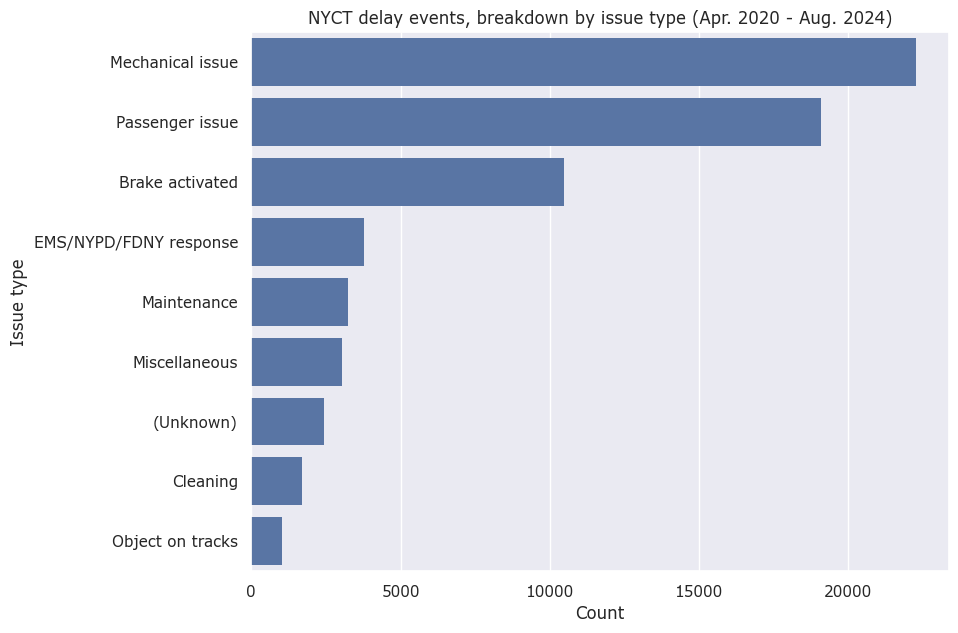

In [449]:
plot_data(x=delay_events_by_issue_type["Count"], 
          y=delay_events_by_issue_type["Issue type"],
          title="NYCT delay events, breakdown by issue type (Apr. 2020 - Aug. 2024)",
          edgecolor='none')

In [450]:
def get_events_by_service(df, service):
    return df[df["Affected services"].apply(lambda x: service in x.split())]

In [451]:
def aggregate_services(list_of_services):
    services_set = set()
    for services in list_of_services:
        services_set = services_set.union(set(services.split()))
    return services_set

In [452]:
all_services = sorted(list(aggregate_services(delay_events["Affected services"])))

In [490]:
def clean_service(service):
    if service == "FX":
        return "F"
    elif service == "6X":
        return "6"
    elif service == "7X":
        return "7"
    elif service == "S Rock":
        return "H"
    elif service in ("J", "Z"):
        return "JZ"
    elif service in ("S Fkln", "S 42nd", "SI", "FS", "GS"):
        return None
    return service

In [491]:
def get_num_matching_delays_by_service(services, delays_df):
    counts = {}
    for service in services:
        cleaned_service = clean_service(service)
        if cleaned_service:
            if cleaned_service in counts:
                counts[cleaned_service] += len(get_events_by_service(delays_df, service))
            else:
                counts[cleaned_service] = len(get_events_by_service(delays_df, service))
    return counts

In [492]:
def sort_dict_by_keys(d, descending=True):
    return dict(sorted(d.items(), key=lambda item: -item[1] if descending else item[1]))

In [493]:
TRUNK_TO_COLOR = {
    "IND Eighth Av": "#0039a6",
    "IND Sixth Av": "#ff6319",
    "IND Crosstown": "#6cbe45",
    "BMT Canarsie": "#a7a9ac",
    "BMT Nassau": "#996633",
    "BMT Broadway": "#fccc0a",
    "IRT Broadway": "#ee352e",
    "IRT Lexington": "#00933c",
    "IRT Flushing": "#b933ad",
    "Other": "#808183",
}

In [494]:
SERVICE_TO_TRUNK = {
    ("A", "C", "E"): "IND Eighth Av",
    ("B", "D", "F", "FX", "M"): "IND Sixth Av",
    ("G"): "IND Crosstown",
    ("L"): "BMT Canarsie",
    ("J", "Z", "JZ"): "BMT Nassau",
    ("N", "Q", "R", "W"): "BMT Broadway",
    ("1", "2", "3"): "IRT Broadway",
    ("4", "5", "6", "6X"): "IRT Lexington",
    ("7", "7X"): "IRT Flushing"
}

In [495]:
def get_trunk_for_service(service):
    for services in SERVICE_TO_TRUNK:
        if service in services:
            return SERVICE_TO_TRUNK[services]
    return "Other"

In [496]:
def sort_dict_by_trunk(d, descending=True):
    return dict(sorted(d.items(), key=lambda item: get_trunk_for_service(item[0])))

In [553]:
counts = sort_dict_by_trunk(sort_dict_by_keys(get_num_matching_delays_by_service(all_services, delay_events)))

In [554]:
trunk_lines = [get_trunk_for_service(s) for s in counts.keys()]
colors = [TRUNK_TO_COLOR[t] for t in trunk_lines]

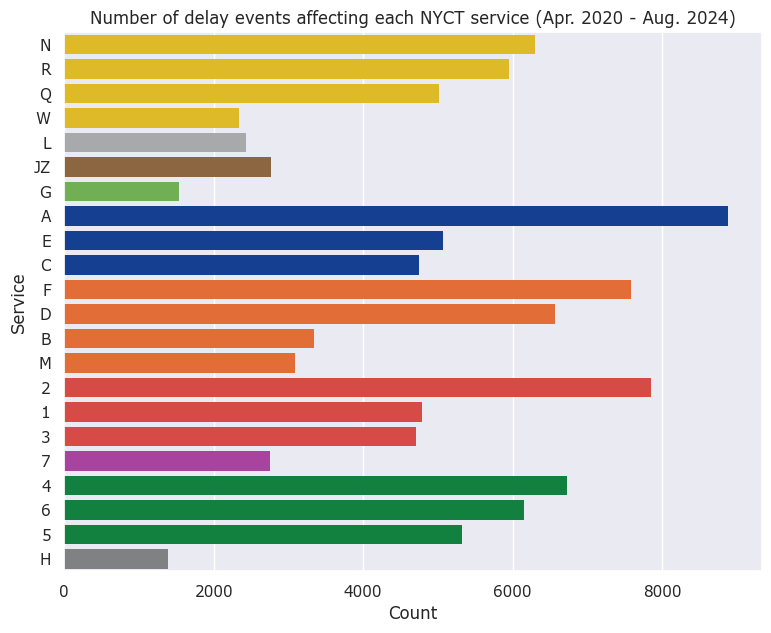

In [499]:
plot_data(x=counts.values(), 
          y=counts.keys(),
          title="Number of delay events affecting each NYCT service (Apr. 2020 - Aug. 2024)",
          x_label="Count",
          y_label="Service",
          palette=colors,
          hue=counts.keys(),
          legend=False,
          edgecolor='none')

In [555]:
counts_scaled_by_num_trains = {}
for service in counts:
    counts_scaled_by_num_trains[service] = \
        float(counts[service] / per_service_monthly_average[per_line["line"] == service]["monthly_average"].iloc[0])
counts_scaled_by_num_trains = sort_dict_by_trunk(sort_dict_by_keys(counts_scaled_by_num_trains))

In [559]:
json_data = []
for key in counts_scaled_by_num_trains:
    json_data.append({"Route": key, "Alerts per train planned": counts_scaled_by_num_trains[key]})
json_data

[{'Route': 'W', 'Alerts per train planned': 2.8198874296435275},
 {'Route': 'N', 'Alerts per train planned': 1.9907923540430141},
 {'Route': 'R', 'Alerts per train planned': 1.8213745212559622},
 {'Route': 'Q', 'Alerts per train planned': 1.3106115813666686},
 {'Route': 'L', 'Alerts per train planned': 0.721125448559845},
 {'Route': 'JZ', 'Alerts per train planned': 1.5563356267426232},
 {'Route': 'G', 'Alerts per train planned': 0.6152172512757383},
 {'Route': 'E', 'Alerts per train planned': 2.440222388354687},
 {'Route': 'A', 'Alerts per train planned': 2.168203126361466},
 {'Route': 'C', 'Alerts per train planned': 1.7509010732335943},
 {'Route': 'D', 'Alerts per train planned': 2.039543759985798},
 {'Route': 'F', 'Alerts per train planned': 1.9988885225827722},
 {'Route': 'B', 'Alerts per train planned': 1.9420950742095073},
 {'Route': 'M', 'Alerts per train planned': 1.3403203142588755},
 {'Route': '2', 'Alerts per train planned': 2.018212627605494},
 {'Route': '1', 'Alerts per t

In [556]:
counts_scaled_by_num_trains

{'W': 2.8198874296435275,
 'N': 1.9907923540430141,
 'R': 1.8213745212559622,
 'Q': 1.3106115813666686,
 'L': 0.721125448559845,
 'JZ': 1.5563356267426232,
 'G': 0.6152172512757383,
 'E': 2.440222388354687,
 'A': 2.168203126361466,
 'C': 1.7509010732335943,
 'D': 2.039543759985798,
 'F': 1.9988885225827722,
 'B': 1.9420950742095073,
 'M': 1.3403203142588755,
 '2': 2.018212627605494,
 '1': 1.7487559106473178,
 '3': 1.4136033056965385,
 '7': 0.6908481394569226,
 '6': 1.9557121345569224,
 '5': 1.505688279263935,
 '4': 1.3776286468072028,
 'H': 1.5908764588845816}

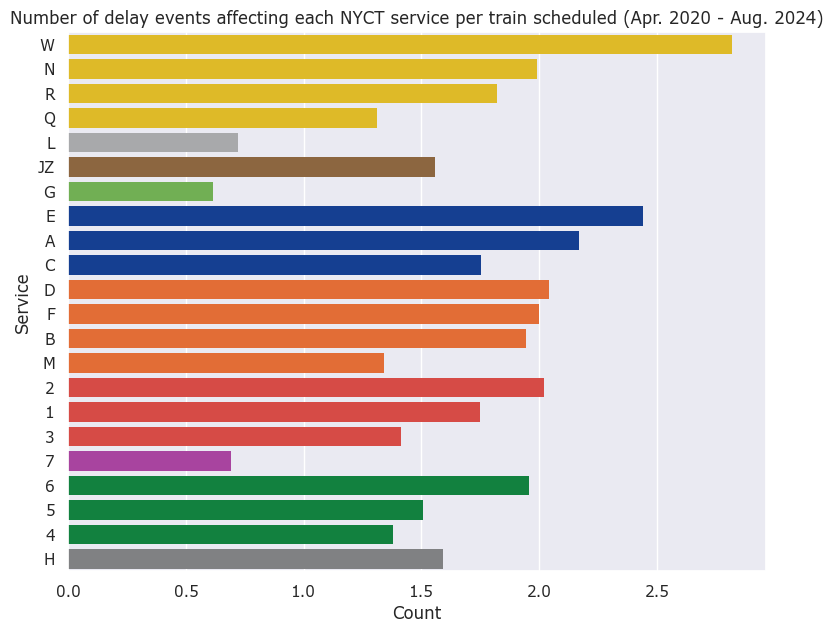

In [539]:
plot_data(x=counts_scaled_by_num_trains.values(), 
          y=counts_scaled_by_num_trains.keys(),
          title="Number of delay events affecting each NYCT service per train scheduled (Apr. 2020 - Aug. 2024)",
          x_label="Count",
          y_label="Service",
          palette=colors,
          hue=counts_scaled_by_num_trains.keys(),
          legend=False,
          edgecolor='none')

In [463]:
MONTHS = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
DAYS = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

In [464]:
def get_month_index_from_datetime_str(datetime_str):
    return datetime.fromisoformat(datetime_str).month

def get_month_from_datetime_str(datetime_str):
    return MONTHS[get_month_index_from_datetime_str(datetime_str) - 1]

def get_month_year_from_datetime_str(datetime_str):
    return datetime.fromisoformat(datetime_str).strftime("%Y-%m")

def get_day_of_week_index(datetime_str):
    dt = datetime.fromisoformat(datetime_str)
    return datetime.fromisoformat(datetime_str).weekday()

def get_day_of_week(datetime_str):
    return DAYS[get_day_of_week_index(datetime_str)]

In [465]:
delay_events["Month of year"] = delay_events["First alert datetime"].apply(get_month_from_datetime_str)
delay_events["Month"] = delay_events["First alert datetime"].apply(get_month_year_from_datetime_str)
delay_events["Month index"] = delay_events["First alert datetime"].apply(get_month_index_from_datetime_str)
delay_events["Day of week"] = delay_events["First alert datetime"].apply(get_day_of_week)
delay_events["Day of week index"] = delay_events["First alert datetime"].apply(get_day_of_week_index)

In [466]:
delay_events_by_month = delay_events.groupby("Month").aggregate(
    **{"Count": ("Event ID", "count"), "Datetime": ("First alert datetime", "first")}
).sort_values("Datetime").reset_index()

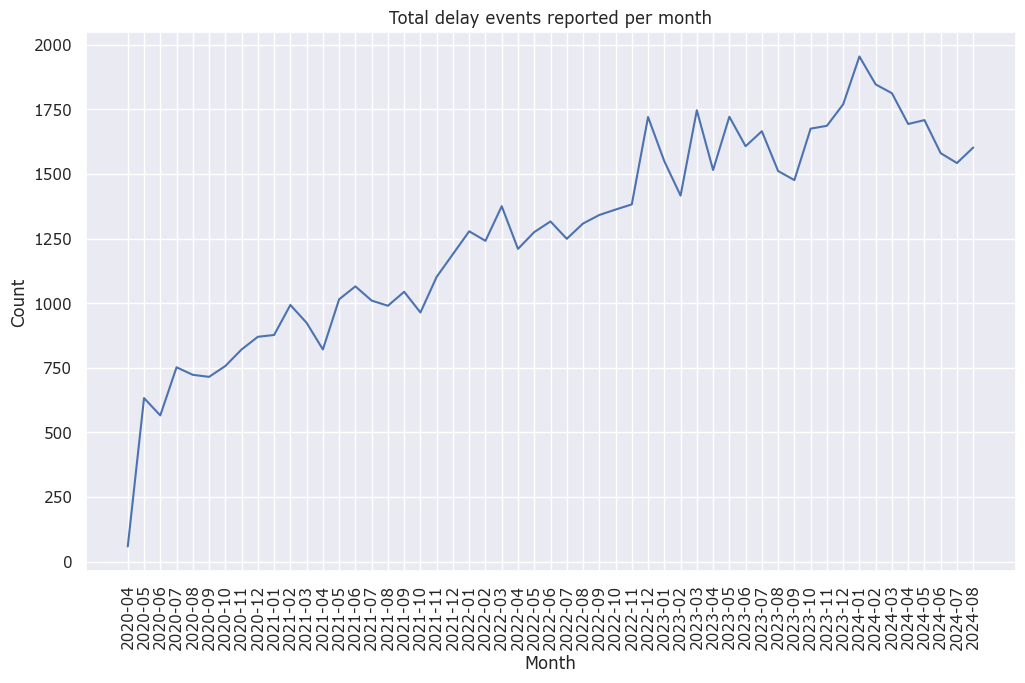

In [467]:
plot_data(x=delay_events_by_month["Month"], 
          y=delay_events_by_month["Count"],
          title="Total delay events reported per month",
          x_label="Month",
          y_label="Count",
          plot_fn=sns.lineplot,
          size=(12,7),
          x_label_rot=90)

In [468]:
delay_events_full_years = delay_events[(delay_events["Month"] >= "2021-01") & (delay_events["Month"] <= "2023-12")]

In [469]:
delay_events_by_month_of_year = delay_events_full_years.groupby("Month of year").aggregate(
    **{"Count": ("Event ID", "count"), "Month index": ("Month index", "first")}
).sort_values("Month index").reset_index()

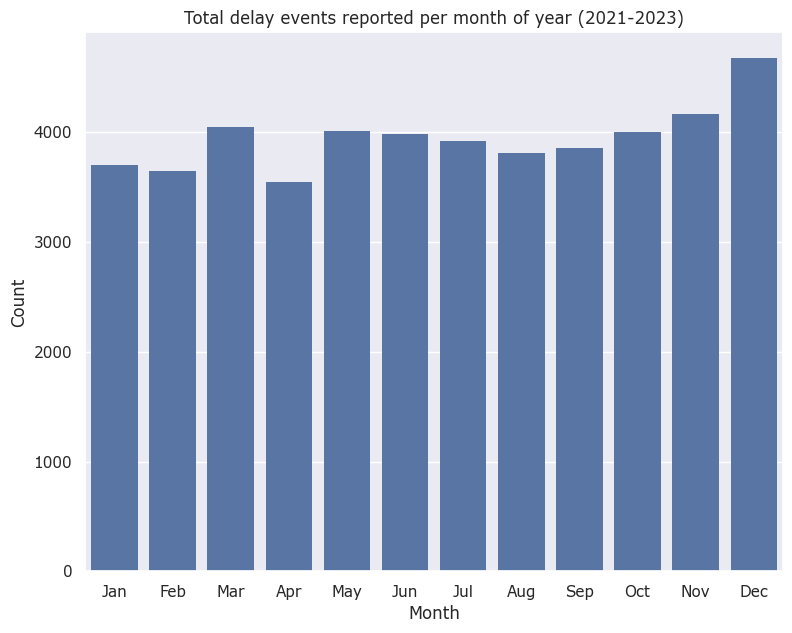

In [470]:
plot_data(x=delay_events_by_month_of_year["Month of year"], 
          y=delay_events_by_month_of_year["Count"],
          title="Total delay events reported per month of year (2021-2023)",
          x_label="Month",
          y_label="Count",
          plot_fn=sns.barplot,
          edgecolor='none')

In [471]:
delay_events_by_day_of_week = delay_events.groupby("Day of week").aggregate(
    **{"Count": ("Event ID", "count"), "Day of week index": ("Day of week index", "first")}
).sort_values("Day of week index").reset_index()

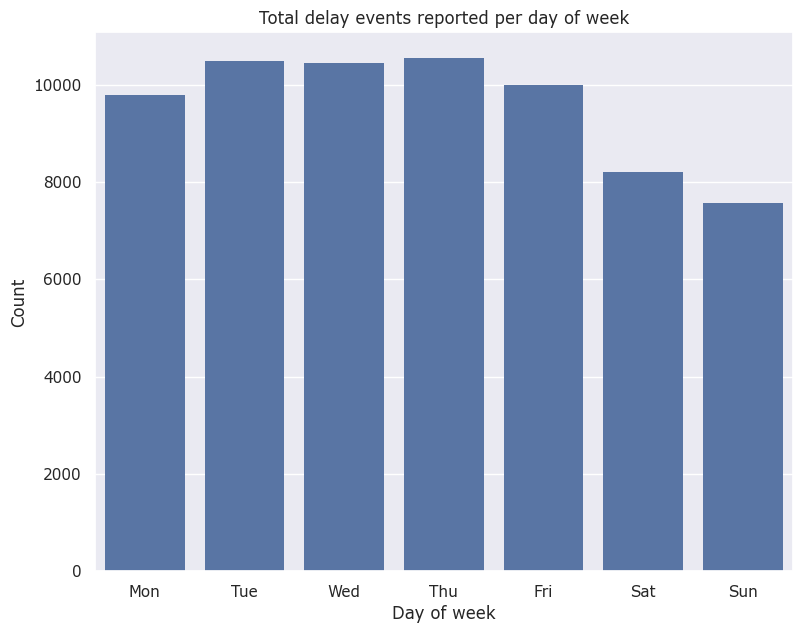

In [472]:
plot_data(x=delay_events_by_day_of_week["Day of week"], 
          y=delay_events_by_day_of_week["Count"],
          title="Total delay events reported per day of week",
          x_label="Day of week",
          y_label="Count",
          plot_fn=sns.barplot,
          edgecolor='none')

In [473]:
delay_events["Station name and services"] = delay_events.apply(
    lambda x: f"{x["Stop Name"]} ({x["Daytime Routes"]})" if not pd.isna(x["GTFS Stop ID"]) else np.nan, axis=1)

In [474]:
delay_events_by_station = delay_events.groupby("Station name and services").aggregate(
    **{"Count": ("Event ID", "count"), "Borough": ("Borough", "first")}
).sort_values("Count", ascending=False).reset_index().loc[:30]

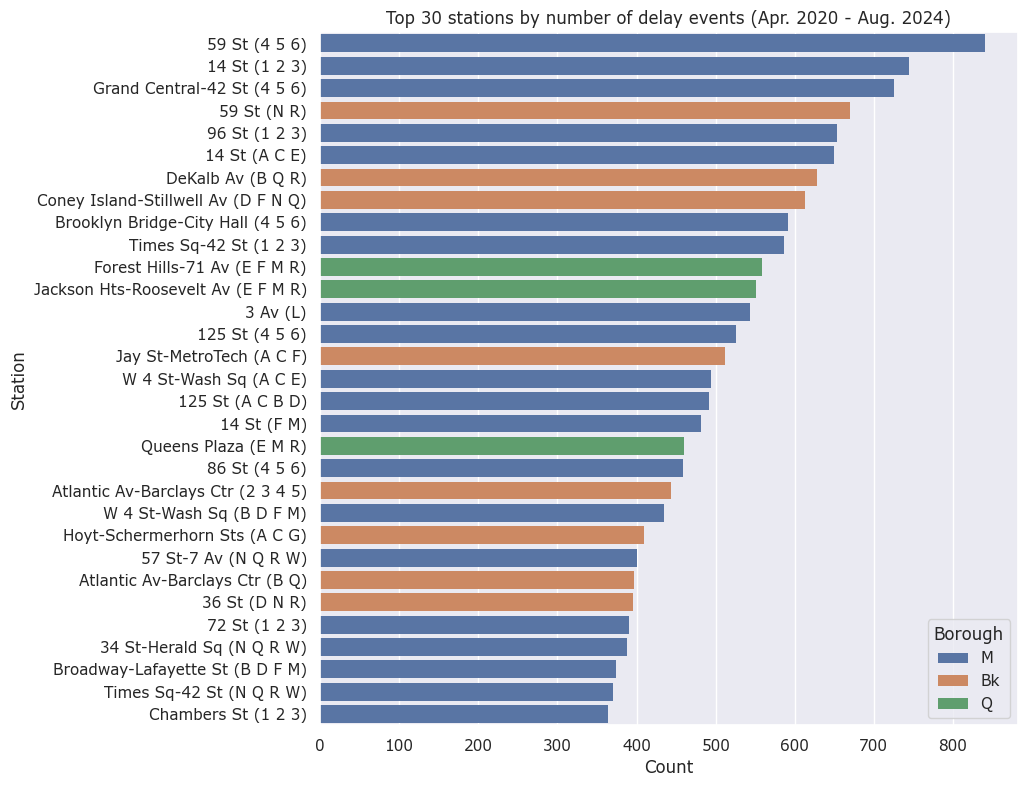

In [475]:
plot_data(x=delay_events_by_station["Count"], 
          y=delay_events_by_station["Station name and services"],
          title="Top 30 stations by number of delay events (Apr. 2020 - Aug. 2024)",
          x_label="Count",
          y_label="Station",
          # palette=colors,
          hue=delay_events_by_station["Borough"],
          legend=True,
          edgecolor='none',
          size=(9, 9))

In [476]:
issue_by_borough = pd.pivot_table(delay_events, values='Event ID', index=['Borough'], columns=['Issue'], aggfunc="count")

In [477]:
issue_by_borough

Issue,(Unknown),Brakes activated,Cleaning,Communication problem,Disruptive passenger,Door problem,Emergency brake cord pulled,Fallen tree,Fire / smoke,Flooding,...,Track inspection,Track maintenance,Unspecified EMS response,Unspecified FDNY response,Unspecified NYPD response,Unspecified maintenance,Unspecified mechanical problem,Unspecified train problem,Vandalism,Work train-related
Borough,,,,,,,,,,,,,,,,,,,,,
Bk,214.0,3309.0,468.0,14.0,2534.0,1498.0,51.0,104.0,379.0,17.0,...,12.0,392.0,396.0,82.0,568.0,119.0,789.0,1466.0,242.0,111.0
Bx,81.0,1047.0,171.0,6.0,1005.0,440.0,12.0,28.0,148.0,4.0,...,2.0,154.0,117.0,45.0,285.0,42.0,260.0,613.0,50.0,25.0
M,390.0,4156.0,856.0,15.0,4365.0,2666.0,98.0,17.0,534.0,31.0,...,16.0,658.0,559.0,124.0,1016.0,120.0,1061.0,2159.0,295.0,170.0
Q,121.0,1479.0,178.0,38.0,1318.0,586.0,24.0,15.0,155.0,5.0,...,1.0,204.0,169.0,31.0,286.0,52.0,350.0,669.0,101.0,59.0
SI,8.0,3.0,NaN,NaN,13.0,6.0,NaN,5.0,5.0,4.0,...,NaN,2.0,NaN,NaN,11.0,4.0,11.0,26.0,NaN,1.0


In [481]:
delay_events["Affected service"] = delay_events["Affected services"].apply(lambda x: x.split())
delay_events_unnested = delay_events.explode("Affected service")
delay_events_unnested = delay_events_unnested.drop(['Affected services'], axis=1)
delay_events_unnested

,Event ID,First alert datetime,Last alert datetime,Number of updates,Combined description,Issue,Issue type,GTFS Stop ID,Division,Line,...,GTFS Latitude,GTFS Longitude,ADA,Month of year,Month,Month index,Day of week,Day of week index,Station name and services,Affected service
0,82,2020-04-28T14:38:00,2020-04-28T14:45:00,2,3 trains are running with delays in both direc...,Brakes activated,Brake activated,301,IRT,Lenox - White Plains Rd,...,40.823880,-73.936470,False,Apr,2020-04,4,Tue,1,Harlem-148 St (3),3
1,85,2020-04-28T20:09:00,2020-04-28T20:09:00,1,Southbound 6 trains are proceeding at normal s...,Signal problem,Mechanical issue,612,IRT,Pelham,...,40.826525,-73.886283,False,Apr,2020-04,4,Tue,1,Whitlock Av (6),6
2,86,2020-04-28T20:45:00,2020-04-28T20:45:00,1,Southbound 2 and 3 trains are proceeding at no...,Signal problem,Mechanical issue,132,IRT,Broadway - 7Av,...,40.737826,-74.000201,False,Apr,2020-04,4,Tue,1,14 St (1 2 3),2
2,86,2020-04-28T20:45:00,2020-04-28T20:45:00,1,Southbound 2 and 3 trains are proceeding at no...,Signal problem,Mechanical issue,132,IRT,Broadway - 7Av,...,40.737826,-74.000201,False,Apr,2020-04,4,Tue,1,14 St (1 2 3),3
3,87,2020-04-28T20:51:00,2020-04-28T20:51:00,1,Southbound 4 trains have resumed making expres...,Signal problem,Mechanical issue,132,IRT,Broadway - 7Av,...,40.737826,-74.000201,False,Apr,2020-04,4,Tue,1,14 St (1 2 3),4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67017,167852,2024-08-30T21:20:00,2024-08-30T21:20:00,1,Northbound 2 3 trains are running with delays ...,Disruptive passenger,Passenger issue,123,IRT,Broadway - 7Av,...,40.778453,-73.981970,True,Aug,2024-08,8,Fri,4,72 St (1 2 3),3
67018,167853,2024-08-30T21:43:00,2024-08-30T21:48:00,2,Southbound A C trains are delayed while we rem...,Unspecified train problem,Mechanical issue,A38,IND,8th Av - Fulton St,...,40.710197,-74.007691,True,Aug,2024-08,8,Fri,4,Fulton St (A C),C
67018,167853,2024-08-30T21:43:00,2024-08-30T21:48:00,2,Southbound A C trains are delayed while we rem...,Unspecified train problem,Mechanical issue,A38,IND,8th Av - Fulton St,...,40.710197,-74.007691,True,Aug,2024-08,8,Fri,4,Fulton St (A C),A
67019,167855,2024-08-30T22:08:00,2024-08-30T22:08:00,1,8 Av-bound L trains are running with delays af...,Brakes activated,Brake activated,L06,BMT,Canarsie,...,40.730953,-73.981628,True,Aug,2024-08,8,Fri,4,1 Av (L),L
